# Machine Learning - Andrew Ng ( Python Implementation)

##  Logistic Regression

### Loading of Data

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df=pd.read_csv("ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [15]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [16]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting of Data

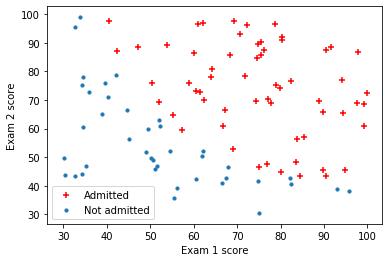

In [17]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### implementation using sklearn

In [18]:
from sklearn.model_selection import train_test_split

X_sk_train, X_sk_test, y_sk_train, y_sk_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('X-sk-train size', X_sk_train.size)
print('X-sk-test size', X_sk_test.size)
print('y-sk-train size', y_sk_train.size)
print('y-sk-test size', y_sk_test.size)

X-sk-train size 140
X-sk-test size 60
y-sk-train size 70
y-sk-test size 30


In [19]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_sk_train:', np.bincount(y_sk_train))
print('Labels counts in y_sk_test:', np.bincount(y_sk_test))

Labels counts in y: [40 60]
Labels counts in y_sk_train: [28 42]
Labels counts in y_sk_test: [12 18]


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_sk_train)
X_sk_train_std = sc.transform(X_sk_train)
X_sk_test_std = sc.transform(X_sk_test)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model = lr.fit(X_sk_train_std, y_sk_train)
alpha = model.intercept_
betas = model.coef_
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [0.7490313]
betas = [[2.13385537 1.75511709]]


In [22]:
y_sk_pred = lr.predict(X_sk_test_std)
print('Misclassified samples: %d' % (y_sk_test != y_sk_pred).sum())

Misclassified samples: 2


In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_sk_test, y_sk_pred)
print(cm)

[[11  1]
 [ 1 17]]


In [24]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_sk_test, y_sk_pred))

Accuracy: 0.93


In [25]:
from sklearn.metrics import classification_report 
print(classification_report(y_sk_test, y_sk_pred))

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.94      0.94      0.94        18

avg / total       0.93      0.93      0.93        30



In [57]:
print('Accuracy: %.2f' % lr.score(X_sk_test_std, y_sk_test))

Accuracy: 0.93


In [60]:
x_sk_test = np.array([45,85]).reshape(1,-1)
prob_sk = lr.predict(x_sk_test)
print("For a student with scores 45 and 85, we predict an admission probability of",prob_sk[0])

For a student with scores 45 and 85, we predict an admission probability of 1


### implementation using raw methods

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [35]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [36]:
# testing the sigmoid function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [37]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [38]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [39]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [40]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [41]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [42]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

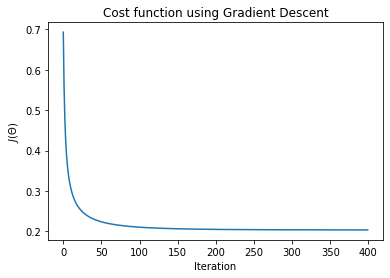

In [43]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

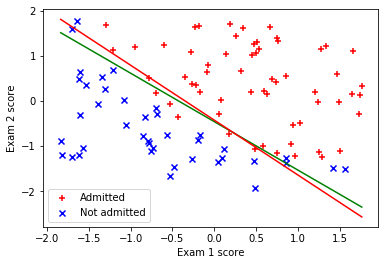

In [45]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
y_sk_value = -(model.intercept_+model.coef_[0,0]*x_value)/model.coef_[0,1]
plt.plot(x_value,y_value, "g")
plt.plot(x_value,y_sk_value, "r")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [16]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [14]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("For a student with scores 45 and 85, we predict an admission probability of",prob[0])

For a student with scores 45 and 85, we predict an admission probability of 0.7677628875792492


### Accuracy on training set 

In [17]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
